In [1]:
import pandas as pd
from scipy.io import arff
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_colwidth', 25)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.expand_frame_repr', True)
# pd.set_option("display.latex.repr", True)
# pd.set_option("display.latex.longtable", True)
# pd.set_option("display.latex.escape", True)

# Dataset Description Report

## Group Members
- Ruslan Basyrov
- Iana Bembeeva
- Ekaterina Grigorashchenko

## Introduction
This report provides a detailed description of two datasets used for analysis: a weather dataset predicting rainfall and a salary dataset. Each dataset's characteristics, attributes, and significance are discussed.


## Dataset 1: Weather Observations Dataset

### Context
The first dataset comprises daily weather observations collected over approximately ten years from various locations across Australia. This dataset enables the prediction of next-day rain, answering the crucial question of whether to carry an umbrella.
[Link to Kaggle](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package).

### Characteristics
- **Samples**: Approximately 10 years of daily observations (exact count of samples may vary).
- **Attributes**: 22 attributes, including both numerical and categorical types.

### Attribute Types and Unique Values
| Attribute          | Type     | Unique Values | Missing Values | Description                                                  |
|--------------------|----------|---------------|----------------|--------------------------------------------------------------|
| Date               | Ordinal   | 3436          | 0              | The date of observation.                                     |
| Location           | Nominal   | 49            | 0              | The name of the weather station location.                   |
| MinTemp            | Ratio    | 389           | 1485           | Minimum temperature in degrees Celsius.                      |
| MaxTemp            | Ratio    | 505           | 1261           | Maximum temperature in degrees Celsius.                      |
| Rainfall           | Ratio    | 681           | 3261           | Amount of rainfall recorded for the day in mm.              |
| Evaporation        | Ratio    | 358           | 62790          | Class A pan evaporation (mm) in the 24 hours to 9am.       |
| Sunshine           | Ratio    | 145           | 69835          | Number of hours of bright sunshine in the day.              |
| WindGustDir        | Nominal   | 16            | 10326          | Direction of the strongest wind gust in the last 24 hours.  |
| WindGustSpeed      | Ratio    | 67            | 10263          | Speed (km/h) of the strongest wind gust in the last 24 hours. |
| WindDir9am         | Nominal   | 16            | 10566          | Direction of the wind at 9am.                               |
| WindDir3pm         | Nominal   | 16            | 4228           | Direction of the wind at 3pm.                               |
| WindSpeed9am       | Ratio    | 43            | 1767           | Wind speed (km/h) averaged over 10 minutes prior to 9am.   |
| WindSpeed3pm       | Ratio    | 44            | 3062           | Wind speed (km/h) averaged over 10 minutes prior to 3pm.   |
| Humidity9am        | Ratio    | 101           | 2654           | Humidity (percent) at 9am.                                  |
| Humidity3pm        | Ratio    | 101           | 4507           | Humidity (percent) at 3pm.                                  |
| Pressure9am        | Ratio    | 546           | 15065          | Atmospheric pressure (hPa) at 9am.                          |
| Pressure3pm        | Ratio    | 549           | 15028          | Atmospheric pressure (hPa) at 3pm.                          |
| Cloud9am           | Ratio    | 10            | 55888          | Fraction of sky obscured by cloud at 9am (in oktas).        |
| Cloud3pm           | Ratio    | 10            | 1767           | Fraction of sky obscured by cloud at 3pm (in oktas).        |
| Temp9am            | Ratio    | 441           | 3609           | Temperature (degrees C) at 9am.                             |
| Temp3pm            | Ratio    | 502           | 1485           | Temperature (degrees C) at 3pm.                             |
| RainToday          | Nominal   | 2             | 3261           | Yes if precipitation (mm) exceeds 1mm, otherwise No. |
| RainTomorrow       | Nominal   | 2             | 3267           | Indicates whether it will rain tomorrow (Yes/No).           |


### Comments on Reformatting
- **Date**: Should be reformatted to `datetime` for better handling in time series analysis.


### Target Attribute
- **RainTomorrow**: This binary attribute indicates whether it will rain the following day (Yes/No). It is crucial for predicting weather patterns and making informed decisions.

### Importance of Dataset
Understanding the distribution of values in attributes helps in preprocessing steps, such as handling missing values and feature selection, to build accurate predictive models.

In [46]:
# Read the CSV file into a pandas DataFrame
df_rain = pd.read_csv("rain.csv")
df_rain.columns = df_rain.columns.str.replace('_', r'\_', regex=True)

# Display the first few rows of the DataFrame
df_rain.head(5).T

,0,1,2,3,4
Date,2008-12-01,2008-12-02,2008-12-03,2008-12-04,2008-12-05
Location,Albury,Albury,Albury,Albury,Albury
MinTemp,13.4,7.4,12.9,9.2,17.5
MaxTemp,22.9,25.1,25.7,28.0,32.3
Rainfall,0.6,0.0,0.0,0.0,1.0
Evaporation,NaN,NaN,NaN,NaN,NaN
Sunshine,NaN,NaN,NaN,NaN,NaN
WindGustDir,W,WNW,WSW,NE,W
WindGustSpeed,44.0,44.0,46.0,24.0,41.0
WindDir9am,W,NNW,W,SE,ENE


### Dataset visualizations
1. **Distribution of RainTomorrow** - understanding the balance between classes

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df_rain, x='RainTomorrow', palette='pastel')
plt.title('Distribution of RainTomorrow')
plt.xlabel('If it rains tomorrow')
plt.ylabel('Count')
plt.show()

2. **Histograms of Numeric Attributes**

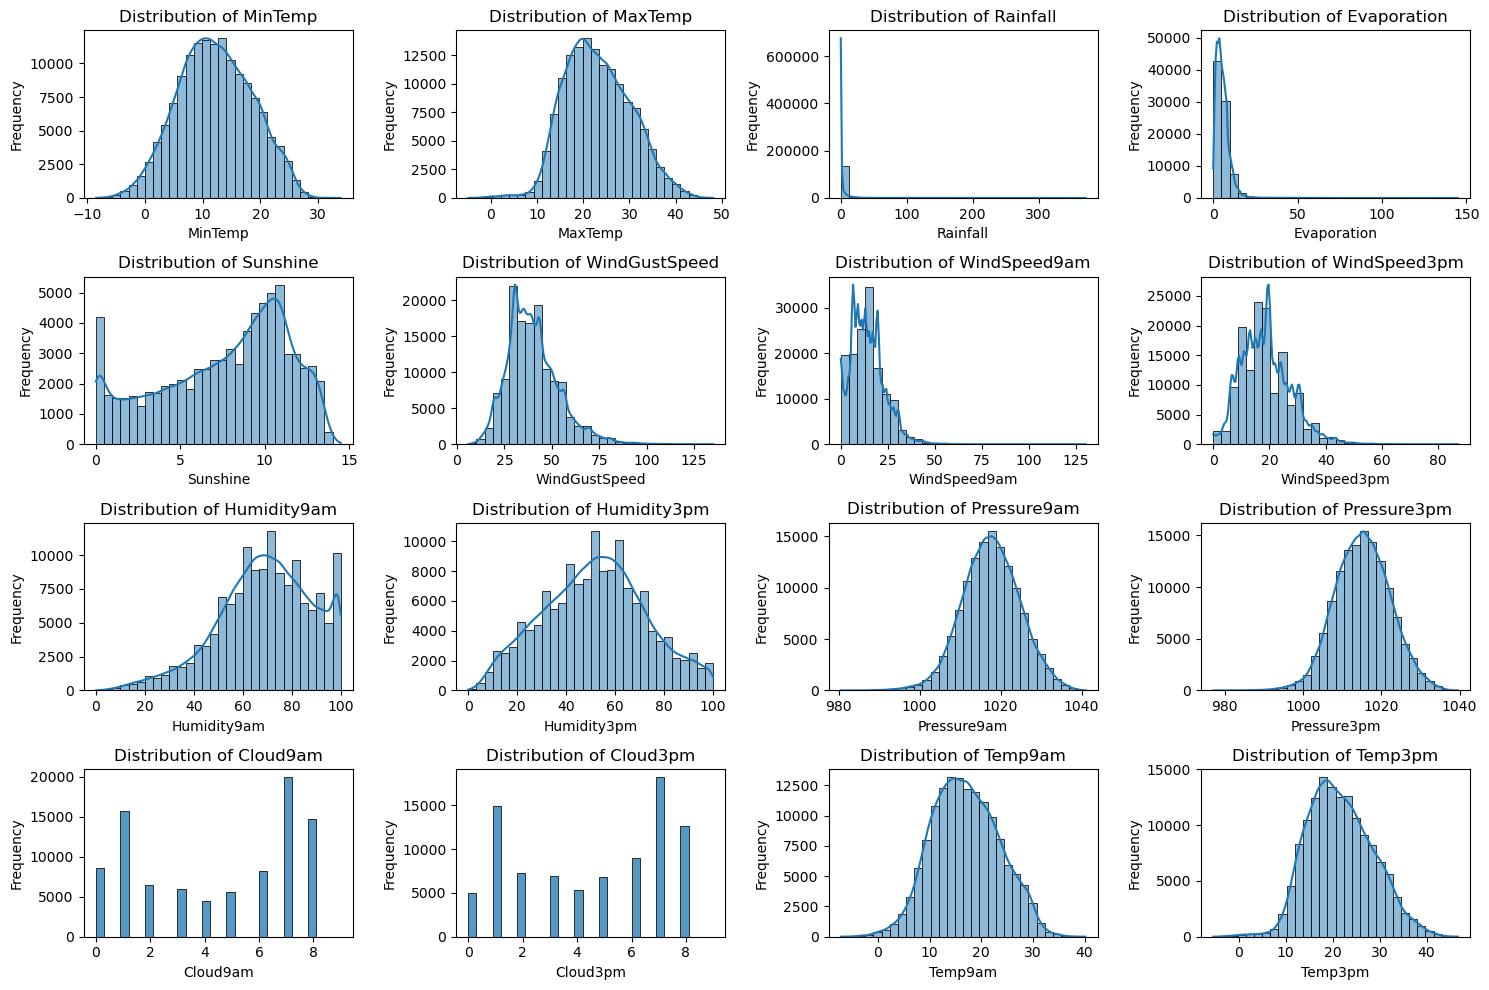

In [30]:
# List of numeric attributes in the weather dataset
numeric_attributes_weather = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
    'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
    'Pressure9am', 'Pressure3pm','Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm'
]

continuous_attributes_weather = [
    'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
    'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 
    'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 
    'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm'
]

plt.figure(figsize=(15, 10))
for i, attr in enumerate(numeric_attributes_weather):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df_rain[attr], bins=30,
                 kde=numeric_attributes_weather[i] in continuous_attributes_weather)
    plt.title(f'Distribution of {attr}')
    plt.xlabel(attr)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

---

## Dataset 2: Employee Salary Dataset

### Context
The second dataset provides annual salary information, including gross and overtime pay, for all active, permanent employees of Montgomery County, MD, for the calendar year 2016. This data is essential for analyzing salary distribution and identifying trends in employee compensation.
[Link to OpenML](https://www.openml.org/search?type=data&id=42125&sort=runs&status=active)

### Characteristics
- **Samples**: 9222 employee records
- **Attributes**: 13 attributes with a mix of numeric and categorical types.

### Attribute Types and Unique Values
| Attribute                    | Type     | Unique Values | Missing Values | Description                                                  |
|------------------------------|----------|---------------|----------------|--------------------------------------------------------------|
| full_name                    | Nominal   | 9222          | 0              | Employee's full name.                                       |
| gender                       | Nominal  | 2             | 17             | Employee's gender (F, M).                                   |
| current_annual_salary        | Ratio  | 3403          | 0              | Employee's current annual salary in USD.                    |
| 2016_gross_pay_received      | Ratio  | 8977          | 100            | Total gross pay received in 2016.                           |
| 2016_overtime_pay            | Ratio  | 6176          | 2917           | Total overtime pay received in 2016.                        |
| department                   | Nominal  | 37            | 0              | Department of the employee.                                  |
| department_name              | Nominal  | 37            | 0              | Full name of the department.                                 |
| division                     | Nominal   | 694           | 0            | Division of the employee within the department.             |
| assignment_category           | Nominal  | 2             | 0            | Employment category (Fulltime-Regular, Parttime-Regular).   |
| employee_position_title      | Nominal   | 385           | 0            | Job title of the employee.                                   |
| underfilled_job_title        | Nominal   | 84            | 0            | Job title of the position being underfilled, if applicable. |
| date_first_hired            | Ordinal   | 2264          | 0            | Date the employee was first hired.                           |
| year_first_hired             | Interval  | 51            | 0            | Year the employee was first hired.                           |

### Target Attribute
- **current_annual_salary**: The primary target attribute used for salary analysis and modeling. Understanding its distribution is crucial for various analyses, including equity and budgeting.

### Comments on Reformatting
- **date_first_hired**: Should be reformatted to `datetime` for better handling in time analysis.

### Importance of Dataset
The distribution of numeric values in the salary dataset provides insight into compensation trends, while the categorical data (such as gender and department) allows for analyzing disparities and ensuring equitable pay practices.


In [ ]:
# On Windows:
# Path to ARFF file with dataset
file_path = 'salaries.arff'  # Adjust the path if needed

# Load the ARFF file using liac-arff
with open(file_path, 'r') as file:
    dataset = arff.load(file)

# Extract data and column names (attributes) from the ARFF file
df_salaries = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

# Display the first few rows of the DataFrame
df_salaries.head()

In [55]:
# On Mac
#!pip install liac-arff
import arff

with open('salaries.arff', 'r') as f:
    dataset = arff.load(f)

# Convert the ARFF data to a Pandas DataFrame
data = dataset['data']  # Extract the data part
attributes = [attr[0] for attr in dataset['attributes']]  # Extract attribute names

# Create a Pandas DataFrame
df_salaries = pd.DataFrame(data, columns=attributes)
df_salaries.columns = df_salaries.columns.str.replace('_', r'\_', regex=True)

# Display the DataFrame
display(df_salaries.head(1).T)

,0
full\_name,"Aarhus, Pam J."
gender,F
current\_annual\_salary,69222.18
2016\_gross\_pay\_received,71225.98
2016\_overtime\_pay,416.1
department,POL
department\_name,Department of Police
division,MSB Information Mgmt ...
assignment\_category,Fulltime-Regular
employee\_position\_title,Office Services Coord...


### Dataset visualizations
1. **Distribution of Current Annual Salary** - analyzing salary ranges and identifying any outliers

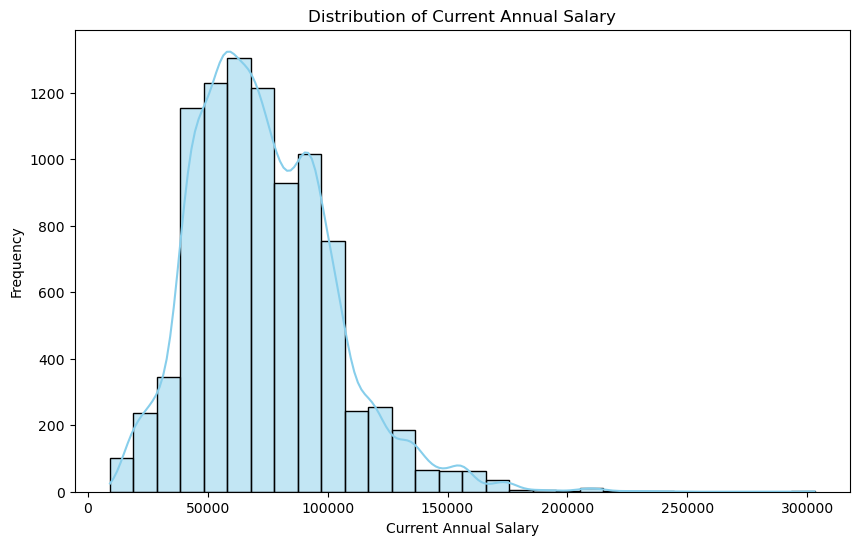

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_salaries['current_annual_salary'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Current Annual Salary')
plt.xlabel('Current Annual Salary')
plt.ylabel('Frequency')
plt.show()

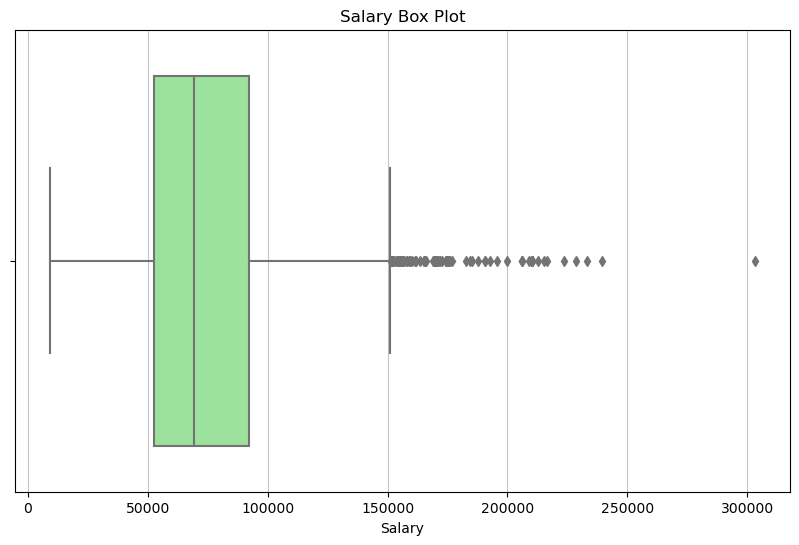

In [25]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_salaries['current_annual_salary'], color='lightgreen')
plt.title('Salary Box Plot')
plt.xlabel('Salary')
plt.grid(axis='x', alpha=0.75)
plt.show()

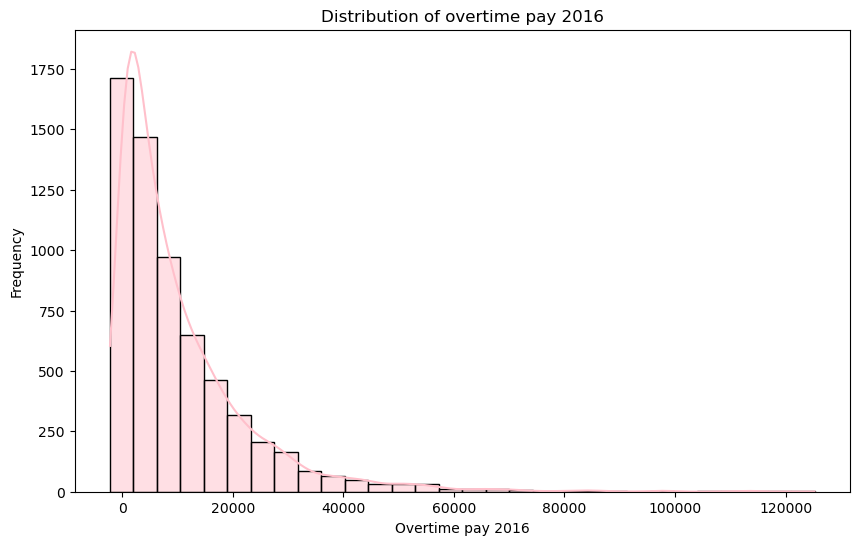

In [35]:
plt.figure(figsize=(10, 6))
sns.histplot(df_salaries['2016_overtime_pay'], bins=30, kde=True, color='pink')
plt.title('Distribution of overtime pay 2016')
plt.xlabel('Overtime pay 2016')
plt.ylabel('Frequency')
plt.show()

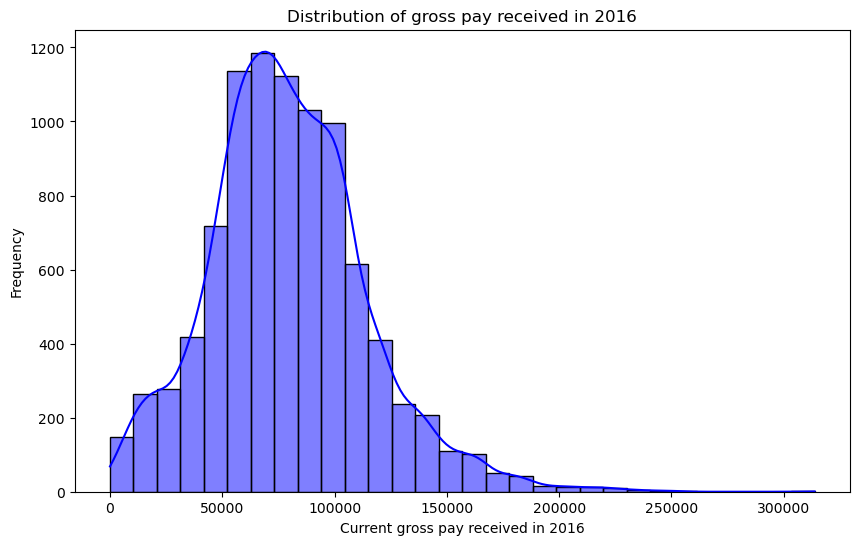

In [32]:
plt.figure(figsize=(10, 6))
sns.histplot(df_salaries['2016_gross_pay_received'], bins=30, kde=True, color='blue')
plt.title('Distribution of gross pay received in 2016')
plt.xlabel('Current gross pay received in 2016')
plt.ylabel('Frequency')
plt.show()

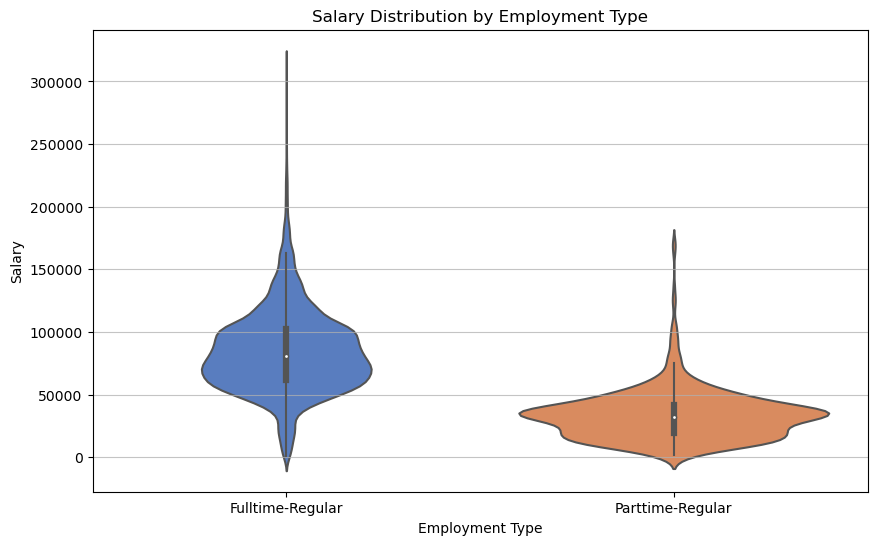

In [23]:
# violin plot for 2016_gross_pay_received based on assignment_category
plt.figure(figsize=(10, 6))
sns.violinplot(x='assignment_category', y='2016_gross_pay_received', data=df_salaries, palette='muted')
plt.title('Salary Distribution by Employment Type')
plt.xlabel('Employment Type')
plt.ylabel('Salary')
plt.grid(axis='y', alpha=0.75)
plt.show()

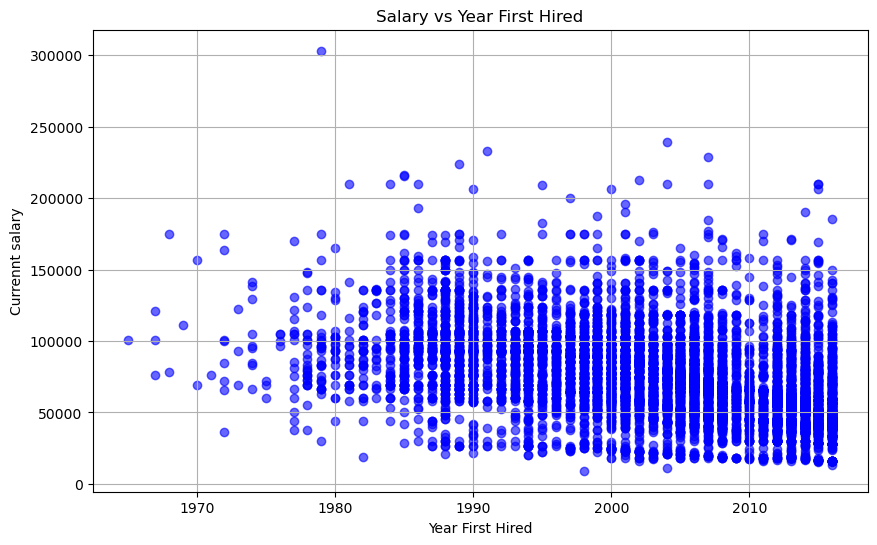

In [29]:
#'year_of_first_hired' and 'salary' columns
plt.figure(figsize=(10, 6))
plt.scatter(df_salaries['year_first_hired'], df_salaries['current_annual_salary'], alpha=0.6, color='blue')
plt.title('Salary vs Year First Hired')
plt.xlabel('Year First Hired')
plt.ylabel('Currennt salary')
plt.grid(True)
plt.show()

2. **Histograms of Numeric Attributes**

In [ ]:
# Gender
plt.figure(figsize=(8, 6))
sns.countplot(data=df_salaries, x='gender', palette='pastel')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Department
plt.figure(figsize=(10, 6))
sns.countplot(data=df_salaries, x='department', palette='pastel')
plt.title('Distribution of Departments')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Assignment Category
plt.figure(figsize=(8, 6))
sns.countplot(data=df_salaries, x='assignment_category', palette='pastel')
plt.title('Distribution of Assignment Categories')
plt.xlabel('Assignment Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
plt.show()

---

### Conclusion

Both datasets offer valuable insights into weather prediction and employee compensation. By understanding their characteristics, distributions, and the significance of attributes, we can apply appropriate data preprocessing techniques and build effective predictive models.
